<a id="1.1"></a>
<h3 style="background-color:powderblue;font-family:newtimeroman;font-size:150%;">We continue to apply machine learning models to solve the classification problem. Same Credit Card customers dataset. Support Vector Classifier.</h3>

<a id="1.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;">Libraries</h3>

In [171]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE

### Data preparation

In [114]:
c_data = pd.read_csv('D:/Coursera/Анализ данных/DataSets/BankChurners/BankChurners.csv')
c_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [115]:
c_data = c_data.drop(['CLIENTNUM',
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
                       axis = 1)
c_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [116]:
c_data.Attrition_Flag = c_data.Attrition_Flag.replace({'Attrited Customer': 1,'Existing Customer': 0})
c_data.Gender = c_data.Gender.replace({'F': 1,'M': 0})
c_data = pd.concat([c_data, pd.get_dummies(c_data['Education_Level']).drop(columns = ['Unknown'])], axis = 1)
c_data = pd.concat([c_data, pd.get_dummies(c_data['Income_Category']).drop(columns = ['Unknown'])], axis = 1)
c_data = pd.concat([c_data, pd.get_dummies(c_data['Marital_Status']).drop(columns = ['Unknown'])], axis = 1)
c_data = pd.concat([c_data, pd.get_dummies(c_data['Card_Category']).drop(columns = ['Platinum'])], axis = 1)
c_data.drop(columns = ['Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category'], inplace = True)
c_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,0,45,0,3,39,5,1,3,12691.0,777,...,0,1,0,0,0,1,0,1,0,0
1,0,49,1,5,44,6,1,2,8256.0,864,...,0,0,0,1,0,0,1,1,0,0
2,0,51,0,3,36,4,1,0,3418.0,0,...,0,0,1,0,0,1,0,1,0,0
3,0,40,1,4,34,3,4,1,3313.0,2517,...,0,0,0,1,0,0,0,1,0,0
4,0,40,0,3,21,5,1,0,4716.0,0,...,0,1,0,0,0,1,0,1,0,0


In [117]:
y = c_data['Attrition_Flag']
x = c_data.drop('Attrition_Flag', axis = 1)

x_train_80, x_test_20, y_train_80, y_test_20 = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print(y_train_80.value_counts())
print(y_test_20.value_counts())

0    6799
1    1302
Name: Attrition_Flag, dtype: int64
0    1701
1     325
Name: Attrition_Flag, dtype: int64


<a id="3"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;">Support Vector Classifier (raw data)</h1>

### Apply to the features selection method

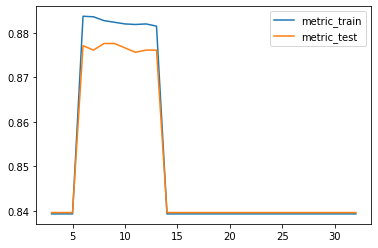

In [118]:
amount_features = []
metric_train = []
metric_test = []

for k in range(3, 33, 1):
    selector = SelectKBest(f_classif, k = k)
    X_train_transformed = selector.fit_transform(x_train_80, y_train_80)
    X_test_transformed = selector.transform(x_test_20)
    classifier = SVC()
    classifier.fit(X_train_transformed, y_train_80)
    amount_features.append(k)
    metric_train.append(classifier.score(X_train_transformed, y_train_80))
    metric_test.append(classifier.score(X_test_transformed, y_test_20))

sns.lineplot(x = amount_features, y = metric_train, legend = 'full', label="metric_train")
sns.lineplot(x = amount_features, y = metric_test, legend = 'full', label="metric_test")

### Let's make a choice: K (number of features) = 6

In [119]:
column_names = x.columns
selector = SelectKBest(f_classif, k = 6)
X_train_transformed = selector.fit_transform(x_train_80, y_train_80)
X_test_transformed = selector.transform(x_test_20)
print(column_names[selector.get_support()])
print(selector.get_params())

Index(['Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')
{'k': 6, 'score_func': <function f_classif at 0x000000000BC8AD90>}


In [120]:
x_train_80 = x_train_80[['Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
#x_train_80 = np.asarray(x_train_80)

x_test_20 = x_test_20[['Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
#x_test_20 = np.asarray(x_test_20)

### Model with probability

In [121]:
model = SVC(kernel = 'rbf', probability = True)
model.fit(x_train_80, y_train_80)

SVC(probability=True)

In [122]:
res = model.predict_proba(x_test_20)

In [123]:
res[0:5]

array([[0.92048998, 0.07951002],
       [0.95125866, 0.04874134],
       [0.61340347, 0.38659653],
       [0.96244998, 0.03755002],
       [0.98044981, 0.01955019]])

### Searching the optimal threshold and evaluating the model

In [124]:
d = {}
threshold_list = np.arange(0.05, 1, 0.05)
pred_proba_df = pd.DataFrame(model.predict_proba(x_test_20))
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x > i else 0)
    f1_score = metrics.f1_score(y_test_20, Y_test_pred.iloc[:,1], pos_label = 1, average='binary')
    print('Our testing f1_score is {}'.format(f1_score))
    cm = metrics.confusion_matrix(y_test_20, Y_test_pred.iloc[:,1])
    d[f1_score] = cm
    print(metrics.confusion_matrix(y_test_20, Y_test_pred.iloc[:,1]))
    print(metrics.classification_report(y_test_20, Y_test_pred.iloc[:,1]))
    
for i in d:
    print(i)
    print(d[i])


******** For i = 0.05 ******
Our testing f1_score is 0.3802647412755716
[[ 680 1021]
 [   9  316]]
              precision    recall  f1-score   support

           0       0.99      0.40      0.57      1701
           1       0.24      0.97      0.38       325

    accuracy                           0.49      2026
   macro avg       0.61      0.69      0.47      2026
weighted avg       0.87      0.49      0.54      2026


******** For i = 0.1 ******
Our testing f1_score is 0.49077490774907745
[[1208  493]
 [  59  266]]
              precision    recall  f1-score   support

           0       0.95      0.71      0.81      1701
           1       0.35      0.82      0.49       325

    accuracy                           0.73      2026
   macro avg       0.65      0.76      0.65      2026
weighted avg       0.86      0.73      0.76      2026


******** For i = 0.15000000000000002 ******
Our testing f1_score is 0.5820512820512821
[[1473  228]
 [  98  227]]
              precision    reca

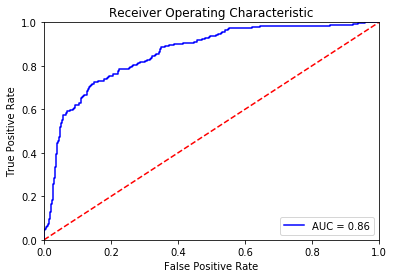

In [125]:
y_hat = model.predict_proba(x_test_20)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test_20, y_hat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a id="3"></a>
<h1 style="background-color:powderblue;font-family:newtimeroman;font-size:150%;text-align:center;">SVC (raw data) has: f-score = 0.61 (for class 1); precision = 0.64 (for class 1); recall = 0.57 (for class 1); AUC = 0.86</h1>

<a id="3"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;">Support Vector Classifier (standardized data)</h1>

In [161]:
y = c_data['Attrition_Flag']
x = c_data.drop('Attrition_Flag', axis = 1)

In [162]:
pt = preprocessing.PowerTransformer()
normalize_data_x = pt.fit_transform(x)
   
normalize_data_x = pd.DataFrame(normalize_data_x, columns = x.columns)
normalize_data_x.head()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,-0.168365,-1.059956,0.516327,0.371128,0.762305,-1.458324,0.495883,0.962782,-0.003768,0.930320,...,-0.463363,2.494645,-0.422675,-0.736437,-0.282405,1.077338,-0.798507,0.270611,-0.107644,-0.240794
1,0.331118,0.943436,1.979971,1.015094,1.417080,-1.458324,-0.406084,0.566512,0.076214,0.554222,...,-0.463363,-0.400859,-0.422675,1.357890,-0.282405,-0.928214,1.252337,0.270611,-0.107644,-0.240794
2,0.581381,-1.059956,0.516327,-0.009129,0.112803,-1.458324,-2.246757,-0.416953,-1.666149,-0.041640,...,-0.463363,-0.400859,2.365881,-0.736437,-0.282405,1.077338,-0.798507,0.270611,-0.107644,-0.240794
3,-0.790608,0.943436,1.255981,-0.259895,-0.530415,1.525554,-1.318361,-0.456520,1.114008,-1.128002,...,-0.463363,-0.400859,-0.422675,1.357890,-0.282405,-0.928214,-0.798507,0.270611,-0.107644,-0.240794
4,-0.790608,-1.059956,0.516327,-1.827473,0.762305,-1.458324,-2.246757,-0.028788,-1.666149,0.205257,...,-0.463363,2.494645,-0.422675,-0.736437,-0.282405,1.077338,-0.798507,0.270611,-0.107644,-0.240794


In [163]:
x_train_80, x_test_20, y_train_80, y_test_20 = train_test_split(normalize_data_x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print(y_train_80.value_counts())
print(y_test_20.value_counts())

0    6799
1    1302
Name: Attrition_Flag, dtype: int64
0    1701
1     325
Name: Attrition_Flag, dtype: int64


### Apply to the features selection method

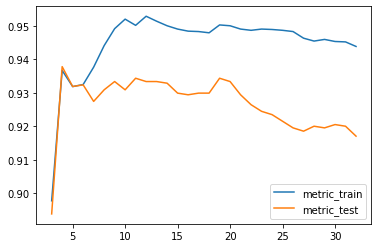

In [132]:
amount_features = []
metric_train = []
metric_test = []

for k in range(3, 33, 1):
    selector = SelectKBest(f_classif, k = k)
    X_train_transformed = selector.fit_transform(x_train_80, y_train_80)
    X_test_transformed = selector.transform(x_test_20)
    classifier = SVC()
    classifier.fit(X_train_transformed, y_train_80)
    amount_features.append(k)
    metric_train.append(classifier.score(X_train_transformed, y_train_80))
    metric_test.append(classifier.score(X_test_transformed, y_test_20))

sns.lineplot(x = amount_features, y = metric_train, legend = 'full', label="metric_train")
sns.lineplot(x = amount_features, y = metric_test, legend = 'full', label="metric_test")

### Let's make a choice: K (number of features) = 4

In [164]:
column_names = x.columns
selector = SelectKBest(f_classif, k = 4)
X_train_transformed = selector.fit_transform(x_train_80, y_train_80)
X_test_transformed = selector.transform(x_test_20)
print(column_names[selector.get_support()])
print(selector.get_params())

Index(['Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1'],
      dtype='object')
{'k': 4, 'score_func': <function f_classif at 0x000000000BC8AD90>}


In [165]:
x_train_80 = x_train_80[column_names[selector.get_support()]]

x_test_20 = x_test_20[column_names[selector.get_support()]]

In [166]:
model1 = SVC(kernel = 'rbf', probability = True)
model1.fit(x_train_80, y_train_80)

SVC(probability=True)

### Searching the optimal threshold and evaluating the model

In [167]:
d = {}
threshold_list = np.arange(0.05, 1, 0.05)
pred_proba_df = pd.DataFrame(model1.predict_proba(x_test_20))
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x > i else 0)
    f1_score = metrics.f1_score(y_test_20, Y_test_pred.iloc[:,1], pos_label = 1, average='binary')
    print('Our testing f1_score is {}'.format(f1_score))
    cm = metrics.confusion_matrix(y_test_20, Y_test_pred.iloc[:,1])
    d[f1_score] = cm
    print(metrics.confusion_matrix(y_test_20, Y_test_pred.iloc[:,1]))
    print(metrics.classification_report(y_test_20, Y_test_pred.iloc[:,1]))
    
for i in d:
    print(i)
    print(d[i])


******** For i = 0.05 ******
Our testing f1_score is 0.6161321671525752
[[1314  387]
 [   8  317]]
              precision    recall  f1-score   support

           0       0.99      0.77      0.87      1701
           1       0.45      0.98      0.62       325

    accuracy                           0.81      2026
   macro avg       0.72      0.87      0.74      2026
weighted avg       0.91      0.81      0.83      2026


******** For i = 0.1 ******
Our testing f1_score is 0.7301587301587301
[[1506  195]
 [  26  299]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1701
           1       0.61      0.92      0.73       325

    accuracy                           0.89      2026
   macro avg       0.79      0.90      0.83      2026
weighted avg       0.92      0.89      0.90      2026


******** For i = 0.15000000000000002 ******
Our testing f1_score is 0.7667560321715818
[[1566  135]
 [  39  286]]
              precision    recal

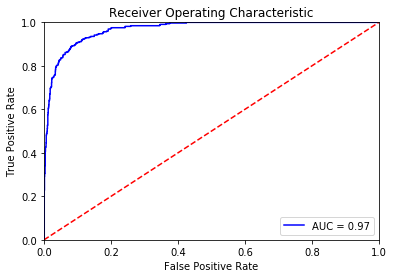

In [168]:
y_hat = model1.predict_proba(x_test_20)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test_20, y_hat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a id="3"></a>
<h1 style="background-color:powderblue;font-family:newtimeroman;font-size:150%;text-align:center;">SVC (standardized data) has: f-score = 0.80 (for class 1); precision = 0.81 (for class 1); recall = 0.80 (for class 1); AUC = 0.97</h1>

<a id="3"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;">Support Vector Classifier SMOTE (standardized data)</h1>

### Let's leave 20% of the data in which there will be no synthesized samples, for the purity of the test

In [169]:
y = c_data['Attrition_Flag']
x = c_data.drop('Attrition_Flag', axis = 1)
x_c_data, x_realtest, y_c_data, y_realtest = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [172]:
oversample = SMOTE()
X, Y = oversample.fit_resample(x_c_data, y_c_data)

In [173]:
print(len(Y))
print(X.info())

13598
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13598 entries, 0 to 13597
Data columns (total 32 columns):
Customer_Age                13598 non-null int64
Gender                      13598 non-null int64
Dependent_count             13598 non-null int64
Months_on_book              13598 non-null int64
Total_Relationship_Count    13598 non-null int64
Months_Inactive_12_mon      13598 non-null int64
Contacts_Count_12_mon       13598 non-null int64
Credit_Limit                13598 non-null float64
Total_Revolving_Bal         13598 non-null int64
Avg_Open_To_Buy             13598 non-null float64
Total_Amt_Chng_Q4_Q1        13598 non-null float64
Total_Trans_Amt             13598 non-null int64
Total_Trans_Ct              13598 non-null int64
Total_Ct_Chng_Q4_Q1         13598 non-null float64
Avg_Utilization_Ratio       13598 non-null float64
College                     13598 non-null uint8
Doctorate                   13598 non-null uint8
Graduate                    13598 non-null

In [174]:
Y.value_counts()

1    6799
0    6799
Name: Attrition_Flag, dtype: int64

In [175]:
pt = preprocessing.PowerTransformer()
normalize_data_x = pt.fit_transform(X)
   
normalize_data_x = pd.DataFrame(normalize_data_x, columns = X.columns)
normalize_data_x.head()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,-1.411992,1.047918,-1.911665,-1.594450,0.427089,0.726027,-0.512136,-0.740793,1.004254,-1.801019,...,-0.372256,-0.316765,-0.342680,1.571830,-0.219677,1.353635,-0.664021,0.297112,-0.088637,-0.201190
1,-0.325535,-0.954273,0.640732,-0.000172,1.025866,-0.359471,0.465366,1.514026,-1.313530,1.554266,...,-0.372256,3.156918,-0.342680,-0.636201,-0.219677,-0.738752,1.505976,-3.365739,-0.088637,4.970423
2,-0.052064,-0.954273,-0.168568,-0.811558,1.591905,0.726027,-1.491400,0.913931,0.519878,0.842875,...,-0.372256,-0.316765,2.918175,-0.636201,-0.219677,1.353635,-0.664021,0.297112,-0.088637,-0.201190
3,-1.411992,1.047918,-0.168568,-1.594450,-0.213591,-1.624687,0.465366,-0.483749,0.810964,-0.693689,...,-0.372256,-0.316765,-0.342680,1.571830,-0.219677,1.353635,-0.664021,0.297112,-0.088637,-0.201190
4,0.496895,-0.954273,-1.012199,0.554628,0.427089,-0.359471,0.465366,1.719892,0.651547,1.789709,...,-0.372256,-0.316765,-0.342680,-0.636201,-0.219677,-0.738752,1.505976,0.297112,-0.088637,-0.201190


In [176]:
x_train_80, x_test_20, y_train_80, y_test_20 = train_test_split(normalize_data_x, Y, test_size=0.2, random_state=42,
                                                                shuffle=True, stratify=Y)
print(y_train_80.value_counts())
print(y_test_20.value_counts())

1    5439
0    5439
Name: Attrition_Flag, dtype: int64
1    1360
0    1360
Name: Attrition_Flag, dtype: int64


### Apply to the features selection method

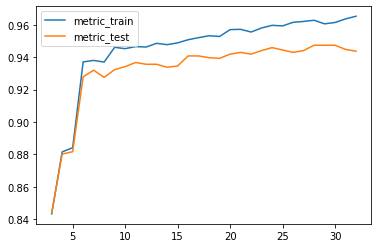

In [177]:
amount_features = []
metric_train = []
metric_test = []

for k in range(3, 33, 1):
    selector = SelectKBest(f_classif, k = k)
    X_train_transformed = selector.fit_transform(x_train_80, y_train_80)
    X_test_transformed = selector.transform(x_test_20)
    classifier = SVC()
    classifier.fit(X_train_transformed, y_train_80)
    amount_features.append(k)
    metric_train.append(classifier.score(X_train_transformed, y_train_80))
    metric_test.append(classifier.score(X_test_transformed, y_test_20))

sns.lineplot(x = amount_features, y = metric_train, legend = 'full', label="metric_train")
sns.lineplot(x = amount_features, y = metric_test, legend = 'full', label="metric_test")

### Let's make a choice: K (number of features) = 11

In [178]:
column_names = x.columns
selector = SelectKBest(f_classif, k = 11)
X_train_transformed = selector.fit_transform(x_train_80, y_train_80)
X_test_transformed = selector.transform(x_test_20)
print(column_names[selector.get_support()])
print(selector.get_params())

Index(['Total_Relationship_Count', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Graduate',
       'High School', '$60K - $80K', 'Married'],
      dtype='object')
{'k': 11, 'score_func': <function f_classif at 0x000000000BC8AD90>}


In [179]:
x_train_80 = x_train_80[column_names[selector.get_support()]]

x_test_20 = x_test_20[column_names[selector.get_support()]]

In [180]:
model2 = SVC(kernel = 'rbf', probability = True)
model2.fit(x_train_80, y_train_80)

SVC(probability=True)

### Searching the optimal threshold and evaluating the model

In [181]:
d = {}
threshold_list = np.arange(0.05, 1, 0.05)
pred_proba_df = pd.DataFrame(model2.predict_proba(x_test_20))
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x > i else 0)
    f1_score = metrics.f1_score(y_test_20, Y_test_pred.iloc[:,1], pos_label = 1, average='binary')
    print('Our testing f1_score is {}'.format(f1_score))
    cm = metrics.confusion_matrix(y_test_20, Y_test_pred.iloc[:,1])
    d[f1_score] = cm
    print(metrics.confusion_matrix(y_test_20, Y_test_pred.iloc[:,1]))
    print(metrics.classification_report(y_test_20, Y_test_pred.iloc[:,1]))
    
for i in d:
    print(i)
    print(d[i])


******** For i = 0.05 ******
Our testing f1_score is 0.8670520231213873
[[ 956  404]
 [  10 1350]]
              precision    recall  f1-score   support

           0       0.99      0.70      0.82      1360
           1       0.77      0.99      0.87      1360

    accuracy                           0.85      2720
   macro avg       0.88      0.85      0.84      2720
weighted avg       0.88      0.85      0.84      2720


******** For i = 0.1 ******
Our testing f1_score is 0.9018817204301075
[[1086  274]
 [  18 1342]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1360
           1       0.83      0.99      0.90      1360

    accuracy                           0.89      2720
   macro avg       0.91      0.89      0.89      2720
weighted avg       0.91      0.89      0.89      2720


******** For i = 0.15000000000000002 ******
Our testing f1_score is 0.9167240192704749
[[1146  214]
 [  28 1332]]
              precision    recal

0.9018817204301075
[[1086  274]
 [  18 1342]]
0.9167240192704749
[[1146  214]
 [  28 1332]]
0.9253940455341506
[[1186  174]
 [  39 1321]]
0.9265017667844523
[[1201  159]
 [  49 1311]]
0.9317125491598142
[[1226  134]
 [  57 1303]]
0.9354023818116204
[[1245  115]
 [  64 1296]]
0.9363404874499819
[[1258  102]
 [  73 1287]]
0.937201615864855
[[1273   87]
 [  84 1276]]
0.933728248796742
[[1280   80]
 [  99 1261]]
0.9329359165424739
[[1288   72]
 [ 108 1252]]
0.9283302063789869
[[1292   68]
 [ 123 1237]]
0.9270872686059691
[[1300   60]
 [ 133 1227]]
0.92243026366068
[[1310   50]
 [ 153 1207]]
0.9170844581565754
[[1316   44]
 [ 171 1189]]
0.9090199140960562
[[1323   37]
 [ 196 1164]]
0.8986539984164686
[[1329   31]
 [ 225 1135]]
0.8772357723577235
[[1339   21]
 [ 281 1079]]
0.820446735395189
[[1347   13]
 [ 405  955]]


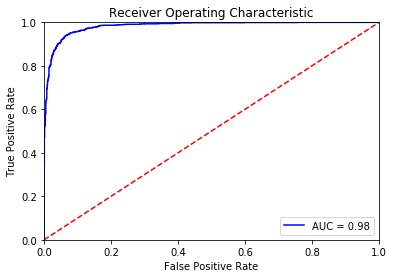

In [182]:
y_hat = model2.predict_proba(x_test_20)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test_20, y_hat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a id="3"></a>
<h1 style="background-color:powderblue;font-family:newtimeroman;font-size:150%;text-align:center;">Support Vector Classifier SMOTE (standardized data), as a result has: f-score = 0.94 (for class 1); precision = 0.94 (for class 1); recall = 0.94 (for class 1); AUC = 0.98</h1>

### Now we will make a test on real (no synthetic) data - 'x_realtest', 'y_realtest'

In [183]:
x_realtest = x_realtest[column_names[selector.get_support()]]

In [184]:
x_realtest_n = pt.fit_transform(x_realtest)

x_realtest_n = pd.DataFrame(x_realtest_n, columns = x_realtest.columns)
x_realtest_n.head()

,Total_Relationship_Count,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Graduate,High School,$60K - $80K,Married
0,0.109270,0.901548,1.269512,-0.112032,0.238679,-0.494896,1.299375,-0.684190,-0.467205,-0.388763,-0.922995
1,-1.173477,-1.648484,0.765380,2.028648,1.646171,0.133706,-1.193455,1.461582,-0.467205,-0.388763,-0.922995
2,0.756987,-1.648484,2.367599,-0.207954,-0.644556,-0.384502,-1.193455,-0.684190,-0.467205,-0.388763,1.083430
3,-1.173477,-0.307447,0.035684,0.364949,0.696837,1.611569,0.507186,-0.684190,-0.467205,-0.388763,1.083430
4,1.407971,0.332862,0.132599,0.526505,0.365312,0.211904,1.483639,1.461582,-0.467205,-0.388763,-0.922995


In [185]:
y_hat_sm = model2.predict_proba(x_realtest_n)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_realtest, y_hat_sm)
roc_auc = metrics.auc(fpr, tpr)

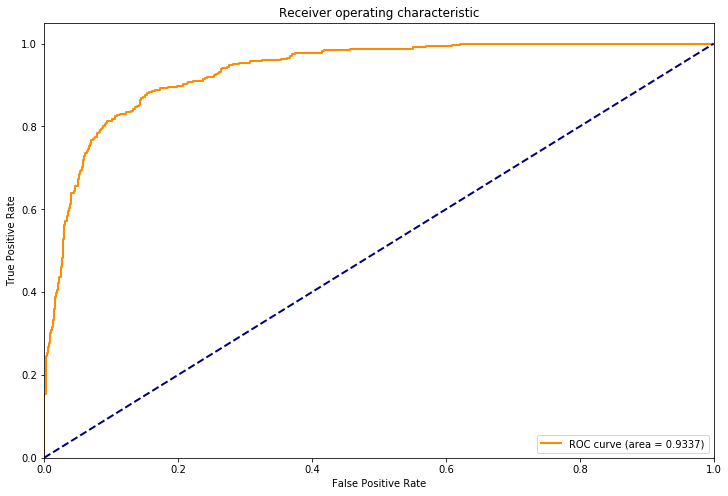

In [186]:
plt.figure(figsize = (12, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [187]:
pred_proba_df = pd.DataFrame(model2.predict_proba(x_realtest_n))
threshold_list = np.arange(0.025, 1, 0.025)
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    f1_score = metrics.f1_score(y_realtest, Y_test_pred.iloc[:,1], pos_label = 1, average = 'binary')
    print('Our testing f1_score is {}'.format(f1_score))

    print(metrics.confusion_matrix(y_realtest, Y_test_pred.iloc[:,1]))
    print(metrics.classification_report(y_realtest, Y_test_pred.iloc[:,1]))


******** For i = 0.025 ******
Our testing f1_score is 0.36373810856183547
[[ 564 1137]
 [   0  325]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50      1701
           1       0.22      1.00      0.36       325

    accuracy                           0.44      2026
   macro avg       0.61      0.67      0.43      2026
weighted avg       0.88      0.44      0.48      2026


******** For i = 0.05 ******
Our testing f1_score is 0.39222829386763813
[[702 999]
 [  2 323]]
              precision    recall  f1-score   support

           0       1.00      0.41      0.58      1701
           1       0.24      0.99      0.39       325

    accuracy                           0.51      2026
   macro avg       0.62      0.70      0.49      2026
weighted avg       0.88      0.51      0.55      2026


******** For i = 0.07500000000000001 ******
Our testing f1_score is 0.41365979381443296
[[795 906]
 [  4 321]]
              precision    recall  

Our testing f1_score is 0.6158730158730158
[[1372  329]
 [  34  291]]
              precision    recall  f1-score   support

           0       0.98      0.81      0.88      1701
           1       0.47      0.90      0.62       325

    accuracy                           0.82      2026
   macro avg       0.72      0.85      0.75      2026
weighted avg       0.89      0.82      0.84      2026


******** For i = 0.675 ******
Our testing f1_score is 0.6243272335844995
[[1387  314]
 [  35  290]]
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      1701
           1       0.48      0.89      0.62       325

    accuracy                           0.83      2026
   macro avg       0.73      0.85      0.76      2026
weighted avg       0.90      0.83      0.85      2026


******** For i = 0.7000000000000001 ******
Our testing f1_score is 0.6359649122807017
[[1404  297]
 [  35  290]]
              precision    recall  f1-score   support

      

<a id="3"></a>
<h1 style="background-color:powderblue;font-family:newtimeroman;font-size:150%;text-align:center;">Support Vector Classifier SMOTE (standardized data) - no synthetic test, as a result has: f-score = 0.71 (for class 1); precision = 0.68 (for class 1); recall = 0.74 (for class 1); AUC = 0.9337</h1>